In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\chuka\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [11]:
# dividing data into train and test
import pandas as pd

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=123)

In [16]:
# applying Logistic Regression Algorithm and Prediction

from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression()

In [19]:
logreg.fit(X_train, y_train)

c:\users\chuka\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = logreg.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.7965367965367965

In [23]:
# applying random forest algorithm & prediction

from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier()

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_rfc_pred = rfc.predict(X_test)

In [27]:
accuracy_score(y_test, y_rfc_pred)

0.7792207792207793

In [28]:
# K Fold cross validation for improving the output
from sklearn.model_selection import GridSearchCV

In [30]:
log_reg = LogisticRegression()

In [38]:
grid = GridSearchCV(log_reg, {'penalty':['l2']}, cv=10)

In [39]:
grid.fit(X,y)

c:\users\chuka\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\chuka\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2']})

In [41]:
grid.best_score_

0.7734791524265209

In [43]:
# model evaluation techniques
# first the Confusion Matrix

from sklearn.metrics import confusion_matrix




In [44]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [45]:
cnf_matrix

array([[127,  16],
       [ 31,  57]], dtype=int64)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted Values')

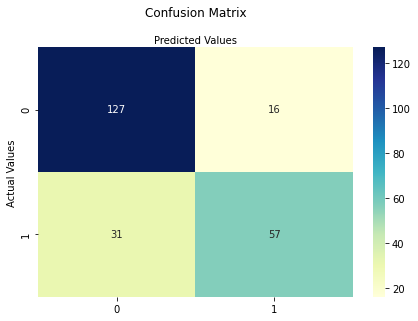

In [48]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

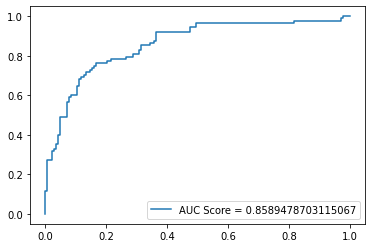

In [50]:
# ROC Curve
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr,label="AUC Score = " + str(auc))
plt.legend(loc=4)
plt.show()